In [1]:
import pandas as pd
import numpy as np
import datetime
import re
from dateutil.parser import parse
import glob
import sys
import openpyxl as opx
import xlrd

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed,GRU, Conv1D

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# 데이터 추출

In [2]:
# kepsh1 엑셀 데이터 추출

files = glob.glob('./kepsh1/*.xls')

all_data = pd.DataFrame()
for f in files:
    data = pd.read_csv(f, encoding='euc-kr', engine= 'python',  header=0, sep='\t+')
    
    df = pd.DataFrame(data)
    
    all_data = all_data.append(df, ignore_index=True)
    print(f, all_data.shape)
all_data


./kepsh1\2020-06-11 12시 08분 35초.xls (94, 35)
./kepsh1\2020-06-11 13시 44분 04초.xls (97, 35)
./kepsh1\2020-06-11 13시 45분 57초.xls (101, 35)
./kepsh1\2020-06-11 13시 56분 03초.xls (103, 35)
./kepsh1\2020-06-11 13시 57분 20초.xls (103, 35)
./kepsh1\2020-06-11 13시 58분 23초.xls (705, 35)
./kepsh1\2020-06-12 00시 00분 07초.xls (2145, 35)
./kepsh1\2020-06-13 00시 00분 07초.xls (3585, 35)
./kepsh1\2020-06-14 00시 00분 06초.xls (5025, 35)
./kepsh1\2020-06-15 00시 00분 06초.xls (6465, 35)
./kepsh1\2020-06-16 00시 00분 05초.xls (7905, 35)
./kepsh1\2020-06-17 00시 00분 05초.xls (8566, 35)
./kepsh1\Z1_2020-06-17 11시 03분 47초.xls (8567, 35)
./kepsh1\Z1_2020-06-17 11시 04분 04초.xls (8620, 35)
./kepsh1\Z1_2020-06-17 11시 56분 28초.xls (9344, 35)
./kepsh1\Z1_2020-06-18 00시 00분 03초.xls (10784, 35)
./kepsh1\Z1_2020-06-19 00시 00분 03초.xls (12224, 35)
./kepsh1\Z1_2020-06-20 00시 00분 03초.xls (13664, 35)
./kepsh1\Z1_2020-06-21 00시 00분 02초.xls (15104, 35)
./kepsh1\Z1_2020-06-22 00시 00분 02초.xls (16544, 35)
./kepsh1\Z1_2020-06-23 00시 00분 01초.xls 

./kepsh1\Z1_2020-12-03 16시 51분 16초.xls (179868, 35)
./kepsh1\Z1_2020-12-04 00시 00분 34초.xls (181308, 35)
./kepsh1\Z1_2020-12-05 00시 00분 33초.xls (182748, 35)
./kepsh1\Z1_2020-12-06 00시 00분 32초.xls (184188, 35)
./kepsh1\Z1_2020-12-07 00시 00분 30초.xls (185628, 35)
./kepsh1\Z1_2020-12-08 00시 00분 29초.xls (187068, 35)
./kepsh1\Z1_2020-12-09 00시 00분 28초.xls (187892, 35)
./kepsh1\Z1_2020-12-09 13시 44분 42초.xls (188508, 35)
./kepsh1\Z1_2020-12-10 00시 00분 27초.xls (189948, 35)
./kepsh1\Z1_2020-12-11 00시 00분 25초.xls (191388, 35)
./kepsh1\Z1_2020-12-12 00시 00분 24초.xls (192828, 35)
./kepsh1\Z1_2020-12-13 00시 00분 23초.xls (194268, 35)
./kepsh1\Z1_2020-12-14 00시 00분 22초.xls (195708, 35)
./kepsh1\Z1_2020-12-15 00시 00분 20초.xls (197148, 35)
./kepsh1\Z1_2020-12-16 00시 00분 19초.xls (198588, 35)
./kepsh1\Z1_2020-12-17 00시 00분 19초.xls (200028, 35)
./kepsh1\Z1_2020-12-18 00시 00분 18초.xls (201468, 35)
./kepsh1\Z1_2020-12-19 00시 00분 16초.xls (202908, 35)
./kepsh1\Z1_2020-12-20 00시 00분 15초.xls (204348, 35)
./kepsh1\Z1_

./kepsh1\Z1_2021-03-03 15시 37분 41초.xls (308047, 91)
./kepsh1\Z1_2021-03-03 15시 38분 48초.xls (308549, 91)
./kepsh1\Z1_2021-03-04 00시 00분 06초.xls (309989, 91)
./kepsh1\Z1_2021-03-05 00시 00분 06초.xls (311429, 91)
./kepsh1\Z1_2021-03-06 00시 00분 06초.xls (312869, 91)
./kepsh1\Z1_2021-03-07 00시 00분 04초.xls (314309, 91)
./kepsh1\Z1_2021-03-08 00시 00분 02초.xls (314983, 91)
./kepsh1\Z1_2021-03-08 11시 15분 18초.xls (315748, 91)
./kepsh1\Z1_2021-03-09 00시 00분 01초.xls (316417, 91)
./kepsh1\Z1_2021-03-09 11시 09분 23초.xls (316533, 91)
./kepsh1\Z1_2021-03-09 13시 07분 36초.xls (317186, 91)
./kepsh1\Z1_2021-03-10 00시 00분 00초.xls (318627, 91)
./kepsh1\Z1_2021-03-11 00시 00분 59초.xls (320067, 91)
./kepsh1\Z1_2021-03-12 00시 00분 57초.xls (321507, 91)
./kepsh1\Z1_2021-03-13 00시 00분 56초.xls (322947, 91)
./kepsh1\Z1_2021-03-14 00시 00분 55초.xls (324387, 91)
./kepsh1\Z1_2021-03-15 00시 00분 54초.xls (325827, 91)
./kepsh1\Z1_2021-03-16 00시 00분 53초.xls (327267, 91)
./kepsh1\Z1_2021-03-17 00시 00분 52초.xls (328707, 91)
./kepsh1\Z1_

./kepsh1\Z1_2021-06-29 00시 00분 51초.xls (473210, 195)
./kepsh1\Z1_2021-06-30 00시 00분 49초.xls (473584, 195)
./kepsh1\Z1_2021-06-30 06시 14분 05초.xls (473585, 196)
./kepsh1\Z1_2021-06-30 06시 16분 58초.xls (474216, 196)
./kepsh1\Z1_2021-06-30 17시 02분 19초.xls (474217, 196)
./kepsh1\Z1_2021-06-30 17시 05분 32초.xls (474445, 196)
./kepsh1\Z1_2021-07-01 10시 50분 39초.xls (474463, 196)
./kepsh1\Z1_2021-07-01 11시 08분 47초.xls (475235, 196)
./kepsh1\Z1_2021-07-02 00시 00분 47초.xls (476675, 196)
./kepsh1\Z1_2021-07-03 00시 00분 46초.xls (478115, 196)
./kepsh1\Z1_2021-07-04 00시 00분 44초.xls (479555, 196)
./kepsh1\Z1_2021-07-05 00시 00분 43초.xls (480551, 196)
./kepsh1\Z1_2021-07-05 16시 38분 11초.xls (480552, 196)
./kepsh1\Z1_2021-07-05 16시 40분 50초.xls (480658, 196)


,Time,1.Z1_메인(W),1.Z1_메인(kWh),2.Z1_B1구히트(W),2.Z1_B1구히트(kWh),3.Z1_B1조명(W),3.Z1_B1조명(kWh),4.Z1_B1전열(W),4.Z1_B1전열(kWh),5.Z1_펌프(W),...,KP1_8DC(kW),KP1_8AC(V),KP1_8AC(A),KP1_8AC(kW),KP1_8(kWh),연료전지소비(W),연료전지소비(kWh),연료전지생산(W),연료전지생산(kWh),경사면일사량(W/㎡)
0,2020-06-11 오후 12:08:35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-06-11 오후 12:09:06,-530.0,227.6,0.0,16.0,0.0,13.7,4.0,115.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-06-11 오후 12:10:06,-653.0,227.6,0.0,16.0,0.0,13.7,2.0,115.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-06-11 오후 12:11:06,-369.0,227.6,0.0,16.0,0.0,13.7,2.0,115.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-06-11 오후 12:12:06,-132.0,227.6,0.0,16.0,0.0,13.7,2.0,115.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480653,2021-07-05 18:21:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,93.0,102.1,0.0,304.9,10.5
480654,2021-07-05 18:22:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,93.0,102.1,0.0,304.9,11.4
480655,2021-07-05 18:23:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,112.0,102.1,0.0,304.9,12.4
480656,2021-07-05 18:24:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,91.0,102.1,0.0,304.9,13.2


In [3]:
all_features = all_data.columns.tolist()
print(all_features)

['Time', '1.Z1_메인(W)', '1.Z1_메인(kWh)', '2.Z1_B1구히트(W)', '2.Z1_B1구히트(kWh)', '3.Z1_B1조명(W)', '3.Z1_B1조명(kWh)', '4.Z1_B1전열(W)', '4.Z1_B1전열(kWh)', '5.Z1_펌프(W)', '5.Z1_펌프(kWh)', '6.Z1_히트(W)', '6.Z1_히트(kWh)', '7.Z1_태양광(W)', '7.Z1_태양광(kWh)', '8.Z1지상메인(W)', '8.Z1지상메인(kWh)', '9.Z1지상전등1(W)', '9.Z1지상전등1(kWh)', '10.Z1지상전열1(W)', '10.Z1지상전열1(kWh)', '11.Z1지상전열2(W)', '11.Z1지상전열2(kWh)', '12.Z1지상전열3(W)', '12.Z1지상전열3(kWh)', '13.Z1지상전등2(W)', '13.Z1지상전등1(kWh)', '14.Z1지상전열4(W)', '14.Z1지상전열4(kWh)', '15.Z1지상전열5(W)', '15.Z1지상전열5(kWh)', '16.Z1지상전열6(W)', '16.Z1지상전열6(kWh)', '17.Z1셔터(W)', '17.Z1셔터(kWh)', 'Z1_1DC(V)', 'Z1_1DC(A)', 'Z1_1DC(kW)', 'Z1_1AC(V)', 'Z1_1AC(A)', 'Z1_1AC(kW)', 'Z1_1(kWh)', 'Z1_2DC(V)', 'Z1_2DC(A)', 'Z1_2DC(kW)', 'Z1_2AC(V)', 'Z1_2AC(A)', 'Z1_2AC(kW)', 'Z1_2(kWh)', 'Z1_3DC(V)', 'Z1_3DC(A)', 'Z1_3DC(kW)', 'Z1_3AC(V)', 'Z1_3AC(A)', 'Z1_3AC(kW)', 'Z1_3(kWh)', 'Z1_4DC(V)', 'Z1_4DC(A)', 'Z1_4DC(kW)', 'Z1_4AC(V)', 'Z1_4AC(A)', 'Z1_4AC(kW)', 'Z1_4(kWh)', 'Z1_5DC(V)', 'Z1_5DC(A)', 'Z1_5DC(kW)', 'Z1_5

In [4]:
# Time 컬럼에서 오전, 오후 한글은 pd.to_date 적용 불가 AM, PM으로 각각 변경

all_data['Time'] = all_data['Time'].replace({'오전': 'AM', '오후':'PM'}, regex=True)

In [5]:
# 시간만 따로 떼서 시간 포맷 바뀌는 지점 확인
all_data['Time'].to_csv('kepsh1_time.csv', encoding='euc-kr')

In [6]:
# Time 컬럼 내 시각형식 다른 두 컬럼 분리 

all_data_1 = all_data.iloc[0:372597,:]
all_data_2 = all_data.iloc[372597:, :]

In [7]:
all_data_1.head()

,Time,1.Z1_메인(W),1.Z1_메인(kWh),2.Z1_B1구히트(W),2.Z1_B1구히트(kWh),3.Z1_B1조명(W),3.Z1_B1조명(kWh),4.Z1_B1전열(W),4.Z1_B1전열(kWh),5.Z1_펌프(W),...,KP1_8DC(kW),KP1_8AC(V),KP1_8AC(A),KP1_8AC(kW),KP1_8(kWh),연료전지소비(W),연료전지소비(kWh),연료전지생산(W),연료전지생산(kWh),경사면일사량(W/㎡)
0,2020-06-11 PM 12:08:35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-06-11 PM 12:09:06,-530.0,227.6,0.0,16.0,0.0,13.7,4.0,115.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-06-11 PM 12:10:06,-653.0,227.6,0.0,16.0,0.0,13.7,2.0,115.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-06-11 PM 12:11:06,-369.0,227.6,0.0,16.0,0.0,13.7,2.0,115.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-06-11 PM 12:12:06,-132.0,227.6,0.0,16.0,0.0,13.7,2.0,115.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# all_data_1는 포맷변경 적용 필요

all_data_1['Time']= pd.to_datetime(all_data_1['Time'], errors = 'coerce', format = "%Y-%m-%d %p %I:%M:%S")
all_data_1.head()

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Time,1.Z1_메인(W),1.Z1_메인(kWh),2.Z1_B1구히트(W),2.Z1_B1구히트(kWh),3.Z1_B1조명(W),3.Z1_B1조명(kWh),4.Z1_B1전열(W),4.Z1_B1전열(kWh),5.Z1_펌프(W),...,KP1_8DC(kW),KP1_8AC(V),KP1_8AC(A),KP1_8AC(kW),KP1_8(kWh),연료전지소비(W),연료전지소비(kWh),연료전지생산(W),연료전지생산(kWh),경사면일사량(W/㎡)
0,2020-06-11 12:08:35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-06-11 12:09:06,-530.0,227.6,0.0,16.0,0.0,13.7,4.0,115.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-06-11 12:10:06,-653.0,227.6,0.0,16.0,0.0,13.7,2.0,115.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-06-11 12:11:06,-369.0,227.6,0.0,16.0,0.0,13.7,2.0,115.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-06-11 12:12:06,-132.0,227.6,0.0,16.0,0.0,13.7,2.0,115.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# all_data_2는 포맷변경 없이 바로 적용 가능

all_data_2['Time']= pd.to_datetime(all_data_2['Time'])
all_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108061 entries, 372597 to 480657
Columns: 196 entries, Time to 경사면일사량(W/㎡)
dtypes: datetime64[ns](1), float64(195)
memory usage: 161.6 MB


C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
all_data_2.head()

,Time,1.Z1_메인(W),1.Z1_메인(kWh),2.Z1_B1구히트(W),2.Z1_B1구히트(kWh),3.Z1_B1조명(W),3.Z1_B1조명(kWh),4.Z1_B1전열(W),4.Z1_B1전열(kWh),5.Z1_펌프(W),...,KP1_8DC(kW),KP1_8AC(V),KP1_8AC(A),KP1_8AC(kW),KP1_8(kWh),연료전지소비(W),연료전지소비(kWh),연료전지생산(W),연료전지생산(kWh),경사면일사량(W/㎡)
372597,2021-04-20 17:45:57,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372598,2021-04-20 17:46:56,-180.0,14156.6,NaN,NaN,0.0,128.5,165.0,473.9,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372599,2021-04-20 17:47:56,-180.0,14156.6,NaN,NaN,0.0,128.5,163.0,473.9,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372600,2021-04-20 17:48:56,-156.0,14156.6,NaN,NaN,0.0,128.5,175.0,473.9,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372601,2021-04-20 17:50:16,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Time 컬럼 포맷 변경 후 다시 concat
all_data_3 = pd.concat([all_data_1, all_data_2])
all_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480658 entries, 0 to 480657
Columns: 196 entries, Time to 경사면일사량(W/㎡)
dtypes: datetime64[ns](1), float64(195)
memory usage: 718.8 MB


In [12]:
# Time null값 찾아서 삭제

all_data_3.drop([255365,255366,255367,255368,255369, 370798,370799,370800,370801,370802,370803,370804,370805,
               370806,370807,370808,370809,370810,370811,370812,370813,370814,370815,370816], inplace=True)              

In [13]:
# Reindexing
all_data_3.reset_index(drop=True, inplace=True)

In [14]:
# 데이터프레임 저장
all_data_3.to_csv('./kepsh1_concat.csv', encoding='euc=kr')

# 합쳐진 데이터 로드

In [117]:
# df = pd.read_csv('./kepsh1_concat.csv', encoding='euc-kr', parse_dates = True, index_col = 'Time')
df = pd.read_csv('./kepsh1_concat.csv', encoding='euc-kr', parse_dates = True)

In [118]:
df.drop(['Unnamed: 0'], inplace = True, axis =1 )
df.head()

,Time,1.Z1_메인(W),1.Z1_메인(kWh),2.Z1_B1구히트(W),2.Z1_B1구히트(kWh),3.Z1_B1조명(W),3.Z1_B1조명(kWh),4.Z1_B1전열(W),4.Z1_B1전열(kWh),5.Z1_펌프(W),...,KP1_8DC(kW),KP1_8AC(V),KP1_8AC(A),KP1_8AC(kW),KP1_8(kWh),연료전지소비(W),연료전지소비(kWh),연료전지생산(W),연료전지생산(kWh),경사면일사량(W/㎡)
0,2020-06-11 12:08:35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-06-11 12:09:06,-530.0,227.6,0.0,16.0,0.0,13.7,4.0,115.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-06-11 12:10:06,-653.0,227.6,0.0,16.0,0.0,13.7,2.0,115.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-06-11 12:11:06,-369.0,227.6,0.0,16.0,0.0,13.7,2.0,115.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-06-11 12:12:06,-132.0,227.6,0.0,16.0,0.0,13.7,2.0,115.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
#새로운 df 생성 후 기존 df에서 시간피쳐 가져오기

df2 = pd.DataFrame()
df2['Time'] = df['Time']
df2['Time']= pd.to_datetime(df2['Time'])

In [120]:
# feature명 바뀌기 전/후 PV 데이터 취합 (PV 6 array의 I, V 센싱 값 sumproduct)
df2['before_PV(W)'] = (df['Z1_1AC(V)']*df['Z1_1AC(A)'] + df['Z1_2AC(V)']*df['Z1_2AC(A)'] + df['Z1_3AC(V)']*df['Z1_3AC(A)'] +
                 df['Z1_4AC(V)']*df['Z1_4AC(A)'] + df['Z1_5AC(V)']*df['Z1_5AC(A)'] + df['Z1_6AC(V)']*df['Z1_6AC(A)'])
df2['after_PV(W)'] = (df['KP1_1AC(V)']*df['KP1_1AC(A)'] + df['KP1_2AC(V)']*df['KP1_2AC(A)'] + df['KP1_3AC(V)']*df['KP1_3AC(A)'] +
                 df['KP1_4AC(V)']*df['KP1_4AC(A)'] + df['KP1_5AC(V)']*df['KP1_5AC(A)'] + df['KP1_6AC(V)']*df['KP1_6AC(A)'])

In [122]:
# 인덱스를 Time 피쳐로 변경 후 피쳐 모두가 NA인 row drop
df3 = df2.set_index('Time')
df4 = df3.dropna(axis=0, how='all')

In [123]:
df4.head()

,before_PV(W),after_PV(W)
Time,,
2021-01-25 14:24:20,0.0,NaN
2021-01-25 14:25:19,17426.4,NaN
2021-01-25 14:26:19,17948.7,NaN
2021-01-25 14:27:19,20534.2,NaN
2021-01-25 14:29:08,20534.2,NaN


In [125]:
# NaN값을 0으로 대체 (두 값을 sum하기 위함)
df4['before_PV(W)'] = df4['before_PV(W)'].fillna(0)
df4['after_PV(W)'] = df4['after_PV(W)'].fillna(0)

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [126]:
df4['KP1_PV(W)'] = df4['before_PV(W)'] + df4['after_PV(W)']

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# PV 데이터 전처리

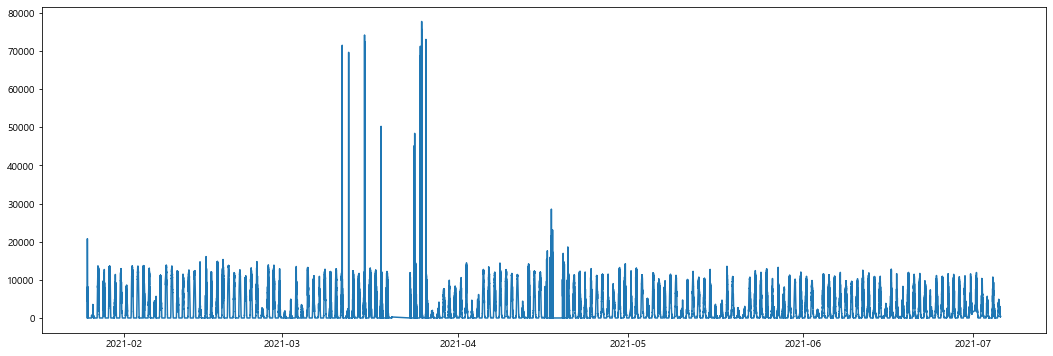

In [128]:
# 데이터 확인
plt.figure(figsize=(18,6))
plt.plot(df4['KP1_PV(W)'])
plt.show()

In [136]:
# PV 용량 15kW이므로 15kW 이상의 데이터 확인
df4[df4['KP1_PV(W)']>15000]

,before_PV(W),after_PV(W),KP1_PV(W)
Time,,,
2021-01-25 14:25:19,17426.4,0.0,17426.4
2021-01-25 14:26:19,17948.7,0.0,17948.7
2021-01-25 14:27:19,20534.2,0.0,20534.2
2021-01-25 14:29:08,20534.2,0.0,20534.2
2021-01-25 14:29:19,20780.2,0.0,20780.2
2021-01-25 14:34:08,20491.9,0.0,20491.9
2021-01-25 14:34:19,19661.6,0.0,19661.6
2021-02-15 12:24:00,15795.4,0.0,15795.4
2021-02-15 12:31:00,15808.2,0.0,15808.2


In [137]:
df4[df4['KP1_PV(W)']15000].count()

before_PV(W)    49
after_PV(W)     49
KP1_PV(W)       49
dtype: int64

In [149]:
# PV 용량 15kW이므로 15kW 이하만 남김
df5 = df4[df4['KP1_PV(W)']< 15000]

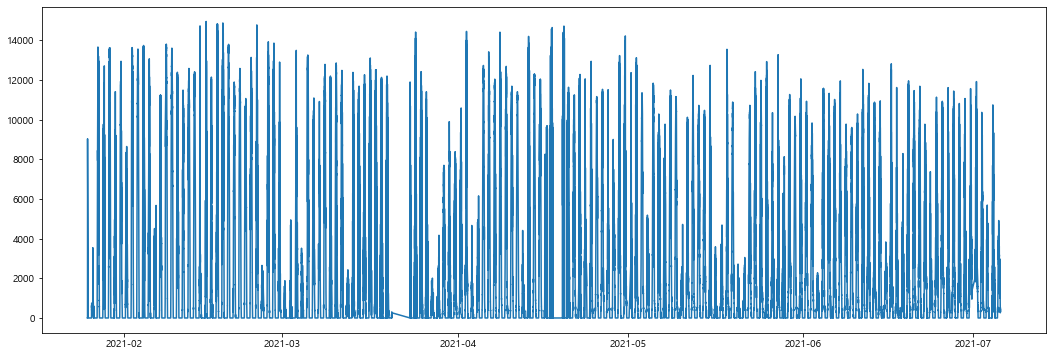

In [152]:
plt.figure(figsize=(18,6))
plt.plot(df5['KP1_PV(W)'])
plt.show()

In [153]:
# 데이터 저장
df5.to_csv('./kepsh1_PV(W).csv', encoding='euc=kr')

# 데이터 분석

## 1시간 평균

In [154]:
df_hour = df5.resample('1H').mean()

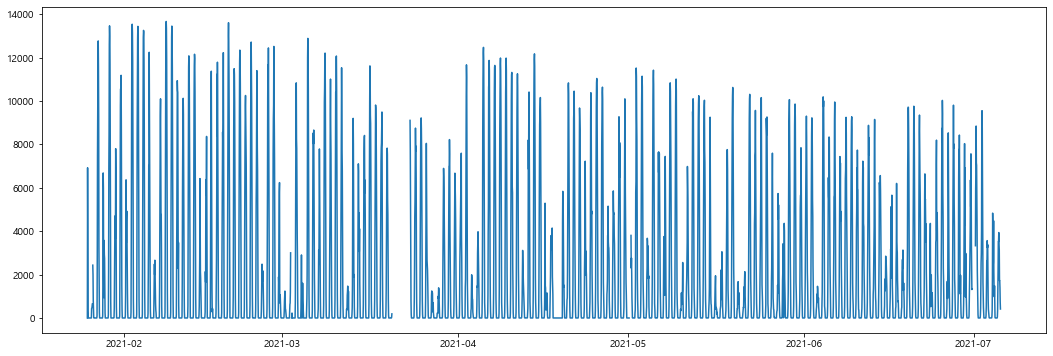

In [155]:
plt.figure(figsize=(18,6))
plt.plot(df_hour['KP1_PV(W)'])
plt.show()

## 3시간평균

In [160]:
df_3h = df5.resample('3H').mean()

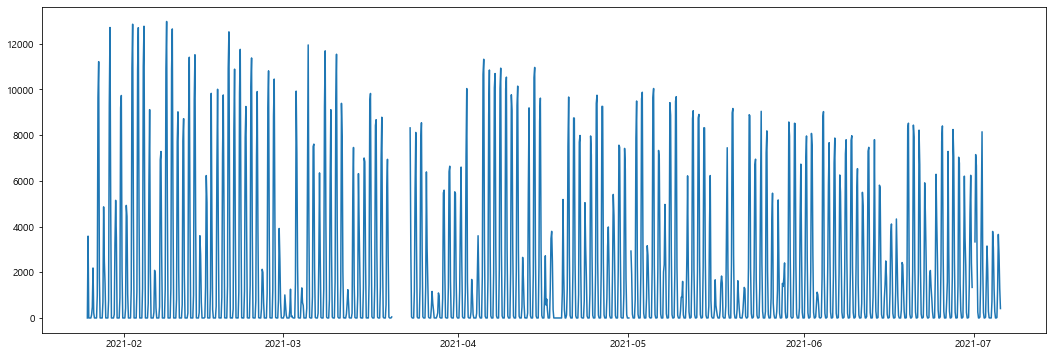

In [161]:
plt.figure(figsize=(18,6))
plt.plot(df_3h['KP1_PV(W)'])
plt.show()